In [88]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the Excel file
df = pd.read_excel('C:/dev/Python/B_Data.xlsx')

# Reverse the order of the rows
df = df.iloc[::-1]

# Set 'Date' as the index of the dataframe
df.set_index('Date', inplace=True)

# Print the first 5 rows of the dataframe
print(df.head())

            Last Price
Date                  
2003-07-01       0.341
2003-07-02       0.344
2003-07-03       0.342
2003-07-07       0.355
2003-07-08       0.364


In [89]:
# Check for null values in 'Last Price'
null_values_column1 = df['Last Price'].isnull().sum()

# Print number of null values in 'Last Price'
print("Null values in 'Last Price': ", null_values_column1)

# Fill the missing values in 'Last Price' with forward fill method
df['Last Price'] = df['Last Price'].fillna(method='ffill')


Null values in 'Last Price':  1


In [90]:
import plotly.express as px

# Plotting 'Last Price' vs 'Date'
fig = px.line(df, y='Last Price', title='S&P500 Last Price')
fig.update_layout(xaxis_title='Date', yaxis_title='Last Price')
fig.show()


In [91]:
from statsmodels.tsa.stattools import adfuller
import plotly.graph_objects as go
import pandas as pd

df_close = df['Last Price']

# Test for stationarity
def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # Plot rolling statistics
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=timeseries, mode='lines', name='Original'))
    fig.add_trace(go.Scatter(y=rolmean, mode='lines', name='Rolling Mean'))
    fig.add_trace(go.Scatter(y=rolstd, mode='lines', name='Rolling Std'))
    fig.update_layout(title='Rolling Mean and Standard Deviation')
    fig.show()

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df_close)


Results of dickey fuller test
Test Statistics                   2.117381
p-value                           0.998807
No. of lags used                 30.000000
Number of observations used    5013.000000
critical value (1%)              -3.431655
critical value (5%)              -2.862117
critical value (10%)             -2.567077
dtype: float64


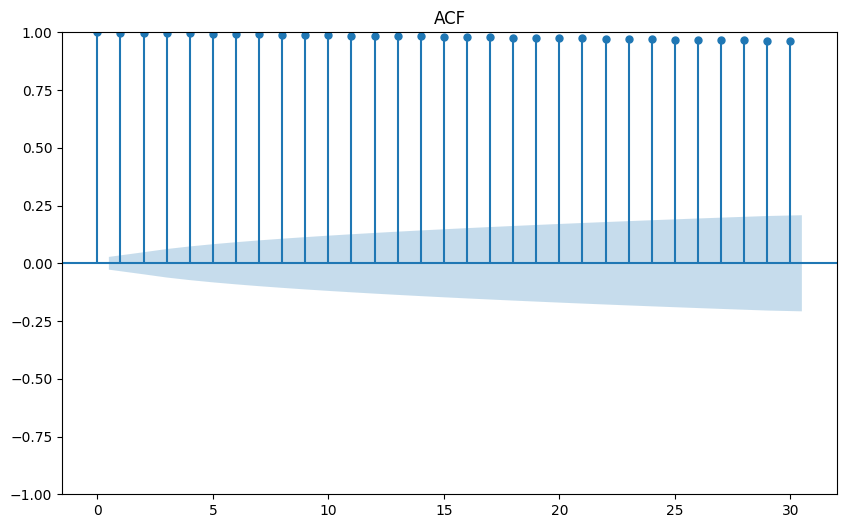

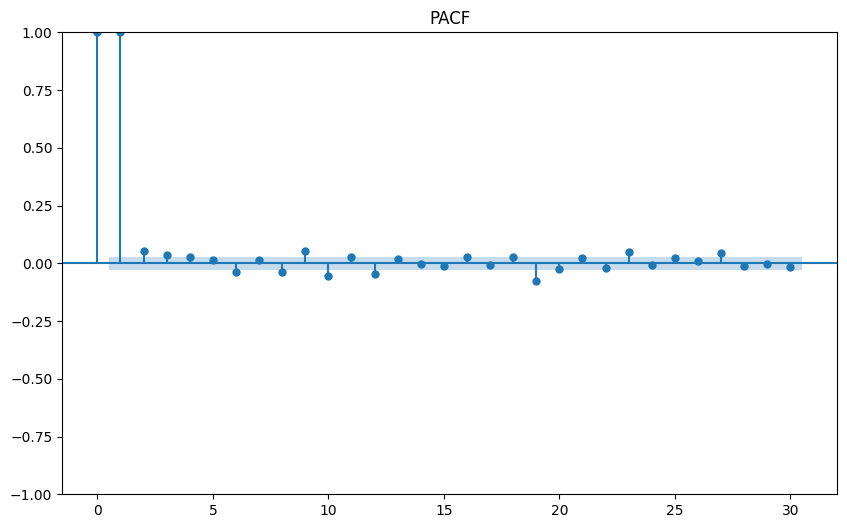

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Plot AutoCorrelation Function (ACF)
fig_acf = plot_acf(df['Last Price'], lags=30)
plt.title('ACF')
plt.show()

# Plot Partial AutoCorrelation Function (PACF)
fig_pacf = plot_pacf(df['Last Price'], lags=30, method='ols')
plt.title('PACF')
plt.show()


                seas  trend  resid  actual_values
Date                                             
2003-07-01  1.028728    NaN    NaN          0.341
2003-07-02  1.029726    NaN    NaN          0.344
2003-07-03  1.026003    NaN    NaN          0.342
2003-07-07  1.021601    NaN    NaN          0.355
2003-07-08  1.014759    NaN    NaN          0.364


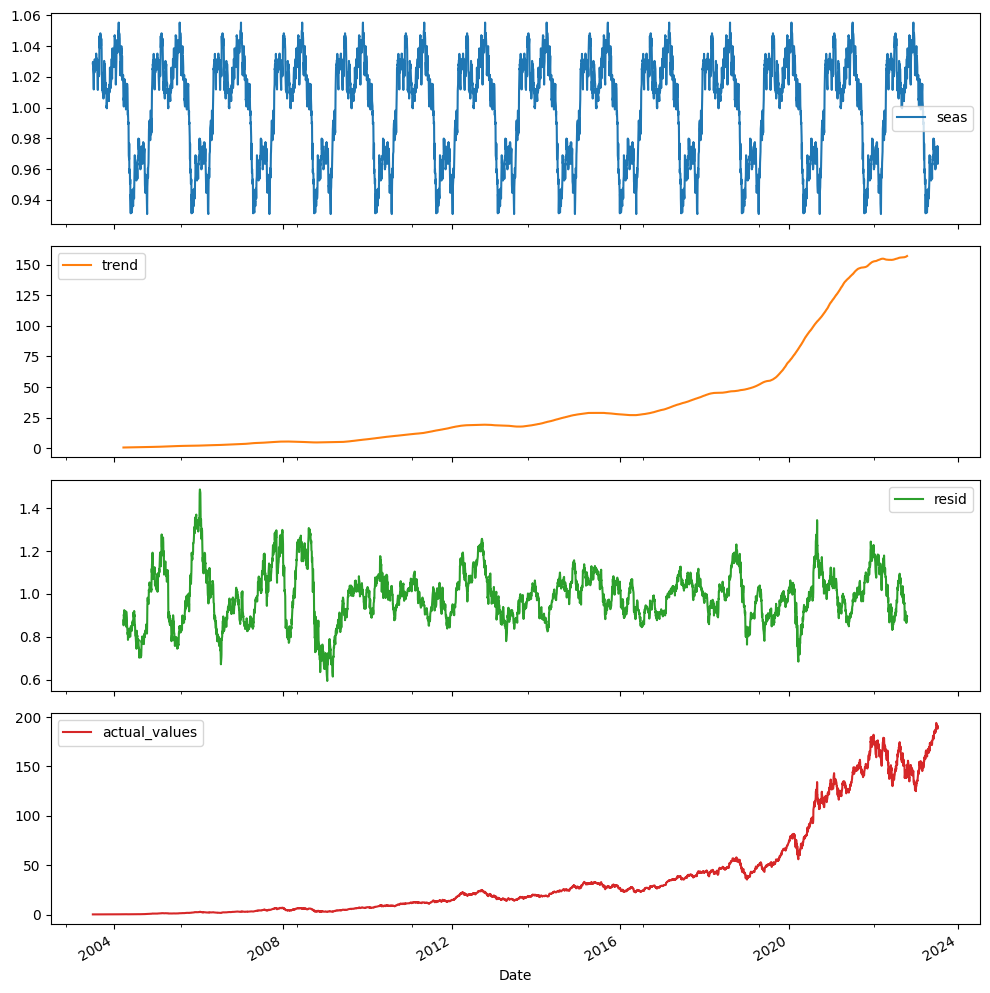

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series with a specified period
result = seasonal_decompose(df['Last Price'], model='multiplicative', period=365)

# Extract the Components
df_reconstructed = pd.concat([result.seasonal, result.trend, result.resid, result.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
print(df_reconstructed.head())

# Plot the components
df_reconstructed.plot(subplots=True, figsize=(10,10))
plt.tight_layout()
plt.show()


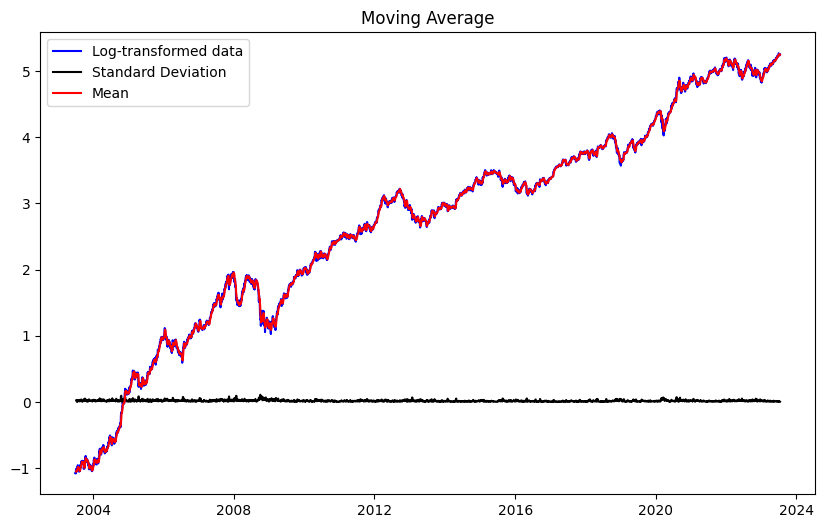

In [94]:
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt

# Taking logs and moving averages to smoothen the increasing

rcParams['figure.figsize'] = 10, 6

df_log = np.log(df['Last Price'])
moving_average = df_log.rolling(6).mean()
std_dev = df_log.rolling(6).std()

# Add the log-transformed data to the plot
plt.plot(df_log, color="blue", label = "Log-transformed data")
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_average, color="red", label = "Mean")

plt.legend(loc='best')
plt.title('Moving Average')
plt.show()


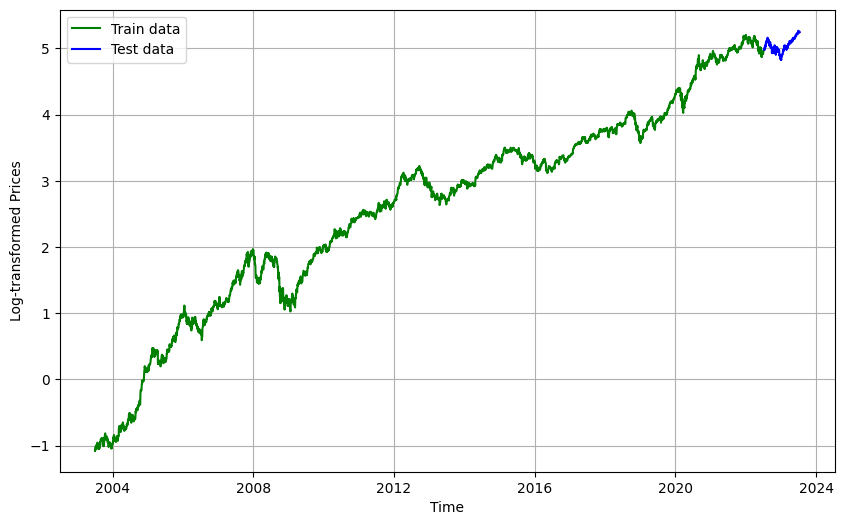

In [95]:
train_data, test_data = df_log[:int(len(df_log)*0.95)], df_log[int(len(df_log)*0.95):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Time')  # Updated x label
plt.ylabel('Log-transformed Prices')  # Updated y label
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,1)[18] intercept   : AIC=-23345.995, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[18] intercept   : AIC=-23347.055, Time=0.43 sec
 ARIMA(1,1,0)(1,0,0)[18] intercept   : AIC=-23345.950, Time=2.32 sec
 ARIMA(0,1,1)(0,0,1)[18] intercept   : AIC=-23346.119, Time=3.00 sec
 ARIMA(0,1,0)(0,0,0)[18]             : AIC=-23331.945, Time=0.27 sec
 ARIMA(0,1,0)(1,0,0)[18] intercept   : AIC=-23345.012, Time=1.52 sec
 ARIMA(0,1,0)(0,0,1)[18] intercept   : AIC=-23345.060, Time=1.85 sec
 ARIMA(0,1,0)(1,0,1)[18] intercept   : AIC=-23343.080, Time=3.51 sec
 ARIMA(1,1,0)(0,0,0)[18] intercept   : AIC=-23347.985, Time=0.57 sec
 ARIMA(1,1,0)(1,0,1)[18] intercept   : AIC=-23344.012, Time=4.68 sec
 ARIMA(2,1,0)(0,0,0)[18] intercept   : AIC=-23348.098, Time=0.41 sec
 ARIMA(2,1,0)(1,0,0)[18] intercept   : AIC=-23346.134, Time=1.81 sec
 ARIMA(2,1,0)(0,0,1)[18] intercept   : AIC=-23346.151, Time=1.76 sec
 ARIMA(2,1,0)(1,0,1)[18] intercept   : AIC=-23344.169, Time=

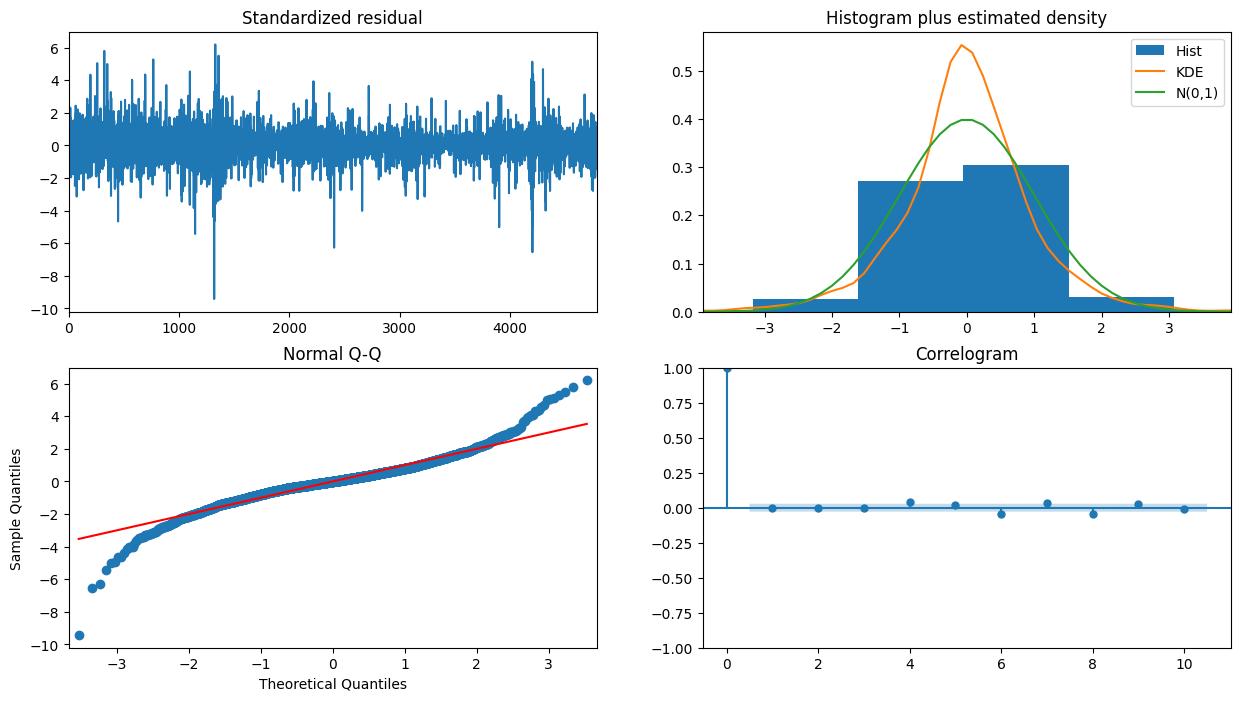

In [96]:
from pmdarima.arima import auto_arima


model_autoARIMA = auto_arima(train_data, start_p=1, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=18,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   #. Seasonality present
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      random = True,
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



NaN values in test_data: 0
NaN values in preds: 0
Date
2022-07-13    146.073473
2022-07-14    146.240372
2022-07-15    146.425096
2022-07-18    146.610596
2022-07-19    146.795946
                 ...    
2023-07-10    199.802865
2023-07-11    200.055470
2023-07-12    200.308395
2023-07-13    200.561639
2023-07-14    200.815204
Length: 253, dtype: float64
Mean Squared Error ARIMA: 451.3167405190032
Root Mean Squared Error ARIMA: 21.244216636981538
Mean Absolute Error ARIMA: 18.81916970324464
Mean Absolute Percentage Error ARIMA: 0.12455586377533857


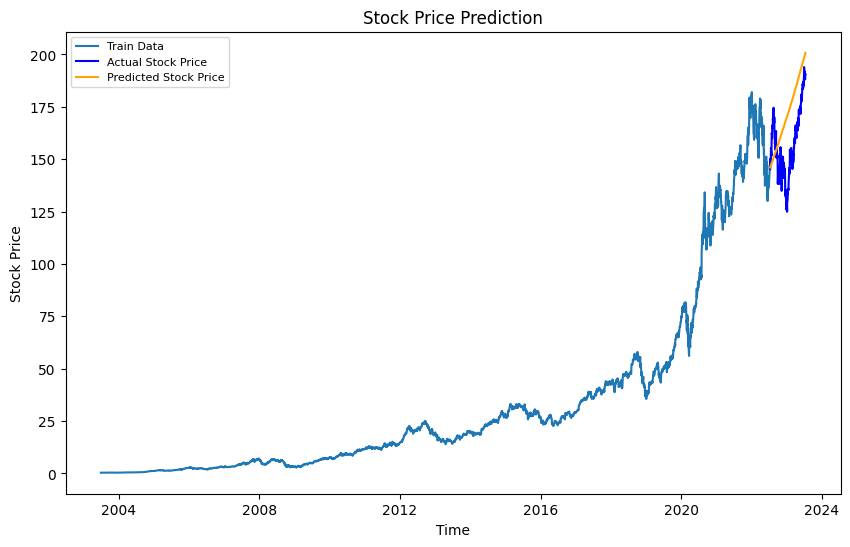

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = model_autoARIMA.predict(n_periods=len(test_data))

preds = np.exp(preds)
train_data = np.exp(train_data)
test_data = np.exp(test_data)

preds = preds.set_axis(test_data.index)

# Check for NaN values in predictions
if preds.isnull().any():
    print('Warning: NaN values found in predictions. Replacing with mean of predictions.')
    preds.fillna(preds.mean(), inplace=True)  # replace NaN values with mean

# Check for NaN values in test data
if test_data.isnull().any():
    print('Warning: NaN values found in test data. Replacing with mean of test data.')
    test_data.fillna(test_data.mean(), inplace=True)  # replace NaN values with mean
    
print('NaN values in test_data:', test_data.isna().sum())
print('NaN values in preds:', preds.isna().sum())

print(preds)

mse = mean_squared_error(test_data, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, preds)
mape = np.mean(np.abs(preds - test_data)/np.abs(test_data))  # MAPE

print('Mean Squared Error ARIMA:', mse)
print('Root Mean Squared Error ARIMA:', rmse)
print('Mean Absolute Error ARIMA:', mae)
print('Mean Absolute Percentage Error ARIMA:', mape)

plt.plot(train_data, label='Train Data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(preds, color='orange', label='Predicted Stock Price')

plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

 13%|█▎        | 32/246 [00:18<02:29,  1.43it/s]c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

 13%|█▎        | 33/246 [00:19<02:31,  1.40it/s]c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

 1

Mean Squared Error ARIMA Rolling: 15.391583007602136
Root Mean Squared Error ARIMA Rolling: 3.9232108033601936
Mean Absolute Error ARIMA Rolling: 2.9866415333716185
Mean Absolute Percentage Error ARIMA Rolling: 0.01955514938949397
R-squared ARIMA Rolling: 0.9401949121110136
Adjusted R-squared ARIMA Rolling: 0.9399498092917964
Mean Squared Logarithmic Error ARIMA Rolling: 0.0006755107475839744
Median Absolute Error ARIMA Rolling: 2.336860326463892


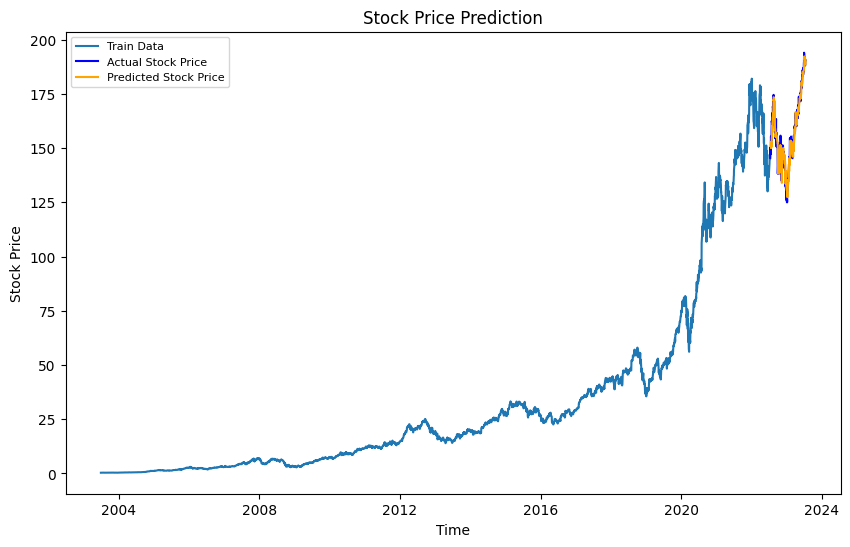

In [98]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error

window_size = 7
steps_ahead = 1
predictions = []

for i in tqdm(range(len(test_data) - window_size - steps_ahead + 1)):
    window_data = test_data.iloc[i : i + window_size]
    model = auto_arima(window_data, seasonal=True, suppress_warnings=True)
    forecast = model.predict(n_periods=steps_ahead)
    predictions.append(forecast)

preds = pd.Series(predictions, index=test_data.index[window_size:])
preds = preds.astype(float)
test_data = test_data.astype(float)

mse = mean_squared_error(test_data[window_size:], preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data[window_size:], preds)
mape = np.mean(np.abs(preds - test_data[window_size:])/np.abs(test_data[window_size:]))

r2 = r2_score(test_data[window_size:], preds)
n = len(test_data[window_size:])   # number of samples
p = 1   # number of predictors
adjusted_r_squared = 1 - (1-r2)*(n-1)/(n-p-1)

msle = mean_squared_log_error(test_data[window_size:], preds)
medae = median_absolute_error(test_data[window_size:], preds)

print('Mean Squared Error ARIMA Rolling:', mse)
print('Root Mean Squared Error ARIMA Rolling:', rmse)
print('Mean Absolute Error ARIMA Rolling:', mae)
print('Mean Absolute Percentage Error ARIMA Rolling:', mape)
print('R-squared ARIMA Rolling:', r2)
print('Adjusted R-squared ARIMA Rolling:', adjusted_r_squared)
print('Mean Squared Logarithmic Error ARIMA Rolling:', msle)
print('Median Absolute Error ARIMA Rolling:', medae)

plt.plot(train_data, label='Train Data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(preds, color='orange', label='Predicted Stock Price')

plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()



c:\Program Files\Python310\lib\site-packages\featuretools\entityset\entityset.py:1910: UserWarning:

index index not found in dataframe, creating new integer column

c:\Program Files\Python310\lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning:

Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created

c:\Program Files\Python310\lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning:

Some specified primitives were not used during DFS:
  agg_primitives: ['max', 'mean', 'min', 'skew', 'std']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.



Z Score: Date
2003-07-01   -0.782806
2003-07-02   -0.782745
2003-07-03   -0.782786
2003-07-07   -0.782520
2003-07-08   -0.782335
                ...   
2023-07-10    3.071155
2023-07-11    3.060306
2023-07-12    3.094901
2023-07-13    3.110663
2023-07-14    3.110663
Name: Last Price, Length: 5044, dtype: float64
Built 4 features
Elapsed: 00:00 | Progress: 100%|██████████
Epoch 1/10
4318/4318 - 9s - loss: 6.8395e-04 - 9s/epoch - 2ms/step
Epoch 2/10
4318/4318 - 7s - loss: 5.3282e-05 - 7s/epoch - 2ms/step
Epoch 3/10
4318/4318 - 7s - loss: 5.2026e-05 - 7s/epoch - 2ms/step
Epoch 4/10
4318/4318 - 7s - loss: 4.5564e-05 - 7s/epoch - 2ms/step
Epoch 5/10
4318/4318 - 7s - loss: 4.5219e-05 - 7s/epoch - 2ms/step
Epoch 6/10
4318/4318 - 7s - loss: 3.6658e-05 - 7s/epoch - 2ms/step
Epoch 7/10
4318/4318 - 7s - loss: 3.6172e-05 - 7s/epoch - 2ms/step
Epoch 8/10
4318/4318 - 7s - loss: 3.5218e-05 - 7s/epoch - 2ms/step
Epoch 9/10
4318/4318 - 7s - loss: 3.2588e-05 - 7s/epoch - 2ms/step
Epoch 10/10
4318/4318 -

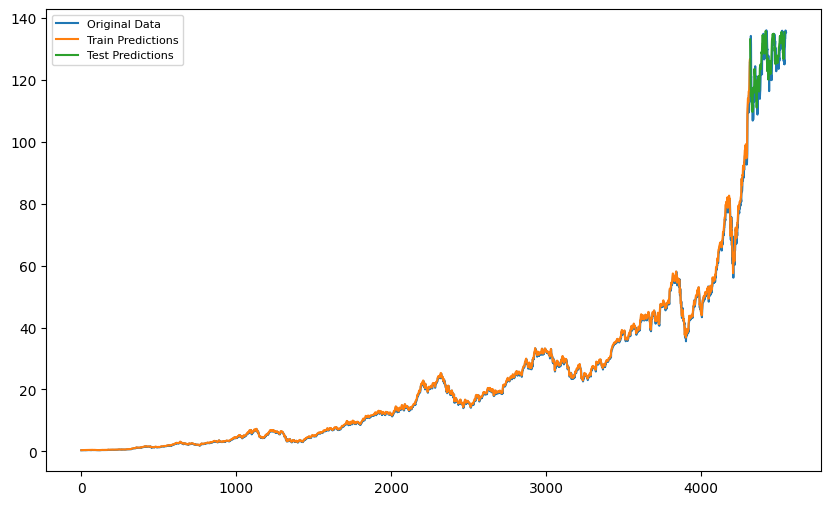

1/1 [==============================] - 0s 26ms/step
Rolling Forecast Score: 2.84 RMSE


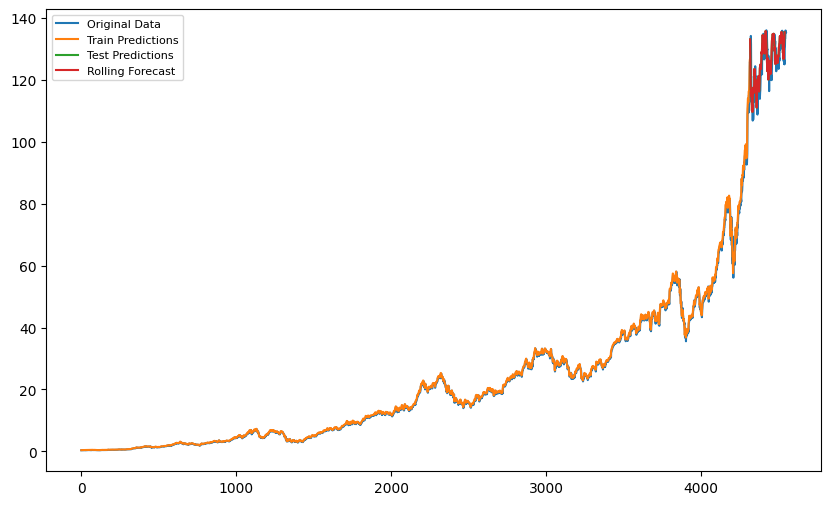

In [99]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import featuretools as ft

# Assuming 'df' is the DataFrame with your data
z_scores = stats.zscore(df['Last Price'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2)
filtered_df = df[filtered_entries]

print('Z Score:', z_scores)

# Create an entityset
es = ft.EntitySet(id='stock_data')

# Add the dataframe as an entity
es = es.add_dataframe(dataframe_name='stock_prices', dataframe=filtered_df, index='index')

# Run Deep Feature Synthesis to create new features
features, feature_defs = ft.dfs(entityset=es, target_dataframe_name='stock_prices',
                                agg_primitives=['mean', 'max', 'min', 'std', 'skew'],
                                trans_primitives=['cum_sum', 'diff', 'percentile'],
                                verbose=True)

# Modify the dataset to include newly created features if needed

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(filtered_df[['Last Price']])

# Define the function to reshape data
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split into train and test sets
train_size = int(len(dataset) * 0.95)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate RMSE
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))


# Plot predictions
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(np.concatenate([trainPredict, np.nan * np.ones((len(testPredict), 1))]), label='Train Predictions')
plt.plot(np.concatenate([np.nan * np.ones((len(trainPredict), 1)), testPredict]), label='Test Predictions')
plt.legend(loc='upper left', fontsize=8)
plt.show()


# Plot the predictions again
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(np.concatenate([trainPredict, np.nan * np.ones((len(testPredict), 1))]), label='Train Predictions')
plt.plot(np.concatenate([np.nan * np.ones((len(trainPredict), 1)), testPredict]), label='Test Predictions')

# Make one-step predictions
look_back = 3
rolling_forecast = []
input_data = testX[0].reshape((1, 1, look_back))  # Reshape to match the expected input shape

for i in range(len(testX) - 1):  
    prediction = model.predict(input_data)
    rolling_forecast.append(scaler.inverse_transform(prediction)[0, 0])  # Invert the scaling
    input_data = np.append(input_data[0, 0, 1:], testX[i + 1, 0, -1])
    input_data = input_data.reshape((1, 1, look_back))

# Get the last prediction
prediction = model.predict(input_data)
rolling_forecast.append(scaler.inverse_transform(prediction)[0, 0])

# Extract the actual values from testY to compare with the rolling forecast
actual_values = testY[0, :len(rolling_forecast)]

# Calculate the RMSE for the rolling forecast
rolling_forecast_score = np.sqrt(mean_squared_error(actual_values, rolling_forecast))
print('Rolling Forecast Score: %.2f RMSE' % (rolling_forecast_score))

# Plot the rolling forecasts
plt.plot(range(len(trainPredict), len(trainPredict) + len(rolling_forecast)), rolling_forecast, label='Rolling Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()



                 Close
Date                  
2022-07-22  150.084286
2022-07-25  152.958788
2022-07-26  152.436384
2022-07-27  150.550326
2022-07-28  153.545714
...                ...
2023-07-10  191.298571
2023-07-11  191.207143
2023-07-12  188.456782
2023-07-13  190.078726
2023-07-14  190.604705

[246 rows x 1 columns]
                 Close
Date                  
2022-08-23  133.063614
2022-08-24  128.526337
2022-08-25  123.216751
2022-08-26  119.179527
2022-08-29  116.874825
...                ...
2023-07-10  131.006821
2023-07-11  132.287231
2023-07-12  133.607620
2023-07-13  134.318420
2023-07-14  135.334946

[224 rows x 1 columns]
[*********************100%***********************]  1 of 1 completed
### ARIMA Strategy Performance ###
Cumulative Returns    Date
2022-07-25    0.019153
2022-07-26    0.01...
Annualized Returns                                             0.277018
Volatility                                                       0.2494
Sharpe Ratio                      

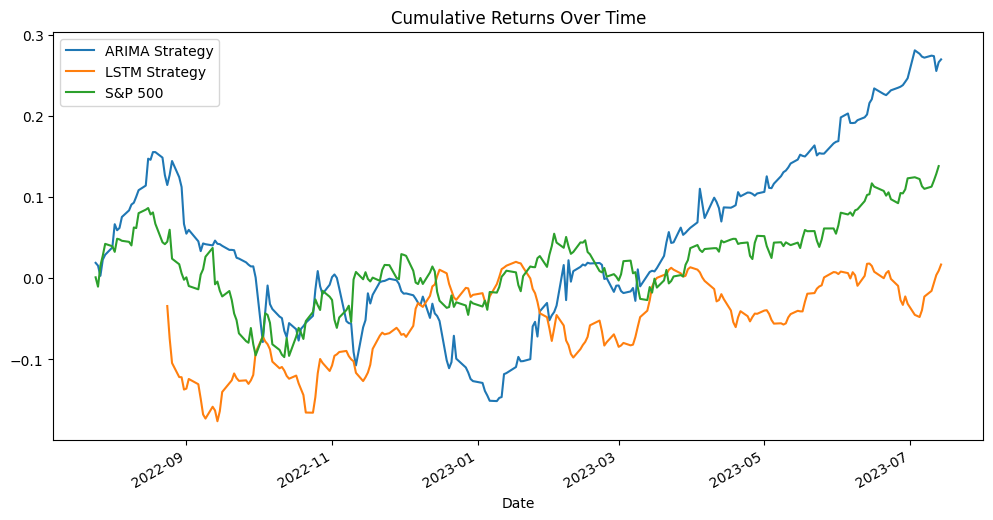

In [103]:
# Importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify your start and end dates
start_date = '2022-07-22'
end_date = '2023-07-14'

# Convert ARIMA predictions into DataFrame format
arima_predictions = pd.DataFrame({
    'Date': test_data.index[window_size:],
    'Close': preds.values
}).set_index('Date')
print(arima_predictions)

# Convert LSTM predictions into DataFrame format
lstm_dates = test_data.index[-len(testPredict):]
lstm_predictions = pd.DataFrame({
    'Date': lstm_dates,
    'Close': testPredict[:,0]
}).set_index('Date')
print(lstm_predictions)

# Fetching S&P 500 data
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

arima_predictions.dropna(inplace=True)
lstm_predictions.dropna(inplace=True)
sp500.dropna(inplace=True)

# Define performance metrics
def cumulative_returns(df):
    cum_returns = (df['Close'].pct_change() + 1).cumprod() - 1
    return cum_returns.dropna()  # Drop the first row (NaN value)


def annualized_returns(df):
    total_return = cumulative_returns(df).iloc[-1]
    days = (df.index[-1] - df.index[0]).days
    return (1 + total_return) ** (365.25/days) - 1

def volatility(df):
    return df['Close'].pct_change().std() * np.sqrt(252)

def sharpe_ratio(df, risk_free_rate=0.01):
    excess_daily_return = df['Close'].pct_change() - risk_free_rate/252
    return excess_daily_return.mean() / excess_daily_return.std() * np.sqrt(252)

def max_drawdown(df):
    cumulative_ret = (df['Close'].pct_change() + 1).cumprod()
    rolling_max = cumulative_ret.cummax()
    drawdown = (cumulative_ret - rolling_max) / rolling_max
    return drawdown.min()

# Compute metrics and comparison
metrics_functions = [cumulative_returns, annualized_returns, volatility, sharpe_ratio, max_drawdown]
strategies = {"ARIMA Strategy": arima_predictions, "LSTM Strategy": lstm_predictions, "S&P 500": sp500}
results = {}

for name, strategy in strategies.items():
    results[name] = [metric(strategy) for metric in metrics_functions]

results_df = pd.DataFrame(results, index=["Cumulative Returns", "Annualized Returns", "Volatility", "Sharpe Ratio", "Max Drawdown"])

# Display results separately
print("### ARIMA Strategy Performance ###")
print(results_df["ARIMA Strategy"])
print("\n### LSTM Strategy Performance ###")
print(results_df["LSTM Strategy"])
print("\n### S&P 500 Performance ###")
print(results_df["S&P 500"])

# Visualization of Cumulative Returns
plt.figure(figsize=(12, 6))
for name, strategy in strategies.items():
    cumulative_returns(strategy).plot(label=name)
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.show()
